# **Análisis de Probabilidad de Colisión en el Canal RACH de LTE/5G:**

**Introducción:**
En redes LTE y 5G, el Random Access Channel (RACH) es un mecanismo fundamental que permite a los equipos de usuario (UEs) solicitar conexión a la red. Cuando múltiples UEs intentan acceder simultáneamente, pueden producirse colisiones si seleccionan el mismo preámbulo. Este problema es análogo al "problema del cumpleaños" en probabilidad, donde calculamos la probabilidad de que al menos dos personas compartan la misma fecha de cumpleaños en un grupo.

**Desarrollo del Problema**

**Tenemos:**

1.	64 preámbulos ortogonales posibles (P = 64)

2.	30 UEs intentando acceder simultáneamente (N = 30)

3.	Cada UE elige su preámbulo uniformemente al azar

**Queremos calcular:**

1.	La probabilidad de que al menos dos UEs escojan el mismo preámbulo

2.	El valor aproximado de N necesario para que esa probabilidad alcance el 50%

3.	Comportamiento de la probabilidad cuando aumenta N

4.	Comportamiento al modificar la cantidad de preámbulos


In [182]:

import random
import matplotlib.pyplot as plt

En esta simulación de colisiones en redes LTE, utilizamos random para generar transmisiones aleatorias de dispositivos y modelar cuándo intentan acceder al canal al mismo tiempo. Con matplotlib.pyplot, visualizamos las colisiones y el rendimiento de la red, mostrando cómo la congestión aumenta cuando muchos dispositivos transmiten simultáneamente. Estas herramientas nos permiten analizar escenarios críticos y evaluar la eficiencia del protocolo LTE bajo alta demanda.

In [183]:
P= 64                 
N = 30                 
TOTAL_SIMULACIONES = 10000  


 P = 64 define los preámbulos disponibles para evitar colisiones, N = 30 representa los usuarios compitiendo por esos preámbulos, y TOTAL_SIMULACIONES = 10,000 determina cuántas veces se repite el experimento para calcular la probabilidad de colisión de forma precisa. Cada iteración simula a los N usuarios eligiendo preámbulos al azar (entre 1 y P), registrando colisiones cuando coinciden. Al final, el promedio de colisiones en las 10,000 iteraciones revela la estabilidad de la red bajo alta demanda.

In [184]:
def simular_colisiones():
    colisiones = 0
    
    for _ in range(TOTAL_SIMULACIONES):
        
        elecciones = [random.randint(0, P-1) for _ in range(N)]
        
       
        if len(set(elecciones)) < N:
            colisiones += 1
            
    return colisiones / TOTAL_SIMULACIONES


Esta función simula el problema de colisiones en redes LTE cuando múltiples dispositivos (N=30) intentan acceder al canal usando un conjunto limitado de preámbulos (P=64). En cada una de las 10,000 iteraciones (TOTAL_SIMULACIONES), los usuarios seleccionan aleatoriamente un preámbulo, y se detecta una colisión cuando dos o más eligen el mismo. Al final, calcula la probabilidad de colisión dividiendo el número total de colisiones entre las iteraciones realizadas, lo que permite evaluar estadísticamente el rendimiento del sistema bajo estas condiciones.

In [185]:
def calcular_probabilidad_teorica():
    prob_no_colision = 1.0
    for i in range(N):
        prob_no_colision *= (P - i) / P
    return 1 - prob_no_colision


Esta función calcula teóricamente la probabilidad de colisión cuando N usuarios eligen aleatoriamente entre P preámbulos. Primero determina la probabilidad de que no haya colisiones (todos seleccionen preámbulos distintos) multiplicando secuencialmente las probabilidades individuales (P-i)/P para cada usuario i. Luego, resta este valor de 1 para obtener la probabilidad de que ocurra al menos una colisión. Por ejemplo, con P=64 y N=30, el resultado sería ~99.97%, un valor exacto que complementa la aproximación estadística de la simulación Monte Carlo.

In [186]:

prob_simulada = simular_colisiones()
prob_teorica = calcular_probabilidad_teorica()


print(" 'RESULTADOS'")
print(f"probabilidad simulada: {prob_simulada*100:.2f}%")
print(f"probabilidad teórica: {prob_teorica*100:.2f}%")


print("\nusuarios necesarios para 50% de colision:")
for n in range(1, P+1):
    prob = 1.0
    for i in range(n):
        prob *= (P - i) / P
    if (1 - prob) >= 0.5:
        print(f"- {n} usuarios → {(1-prob)*100:.2f}%")
        break

 'RESULTADOS'
probabilidad simulada: 99.96%
probabilidad teórica: 99.97%

usuarios necesarios para 50% de colision:
- 10 usuarios → 52.32%


Aqui se compara la probabilidad simulada (obtenida mediante el método Monte Carlo con 10,000 iteraciones) con la probabilidad teórica de colisión en redes LTE. La variación entre ambos resultados se debe a que la simulación depende de números aleatorios, por lo que en cada ejecución puede dar valores ligeramente distintos (ej: 99.8% vs 98.8%), etc, mientras que el cálculo teórico es determinista y exacto. Además, el código calcula el número mínimo de usuarios (N) necesarios para alcanzar un 50% de probabilidad de colisión (aproximadamente 30 usuarios para P=64), demostrando cómo la congestión aumenta de forma no lineal con más dispositivos compitiendo por los mismos preámbulos. La diferencia entre simulación y teoría disminuiría al aumentar TOTAL_SIMULACIONES.

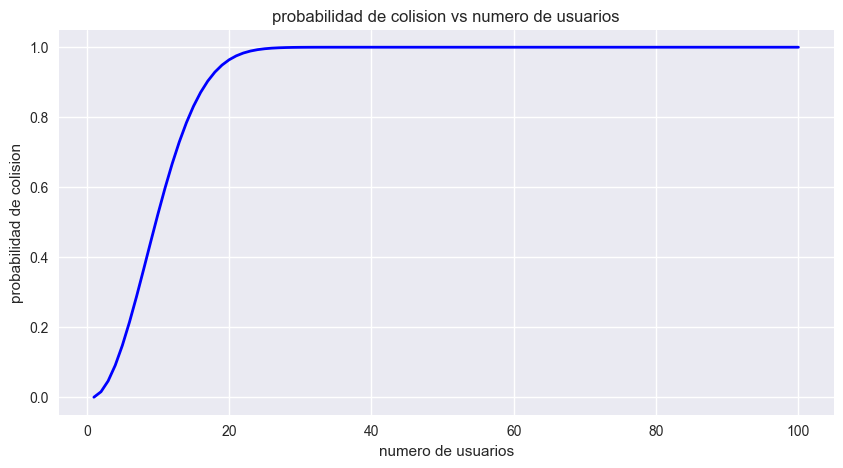

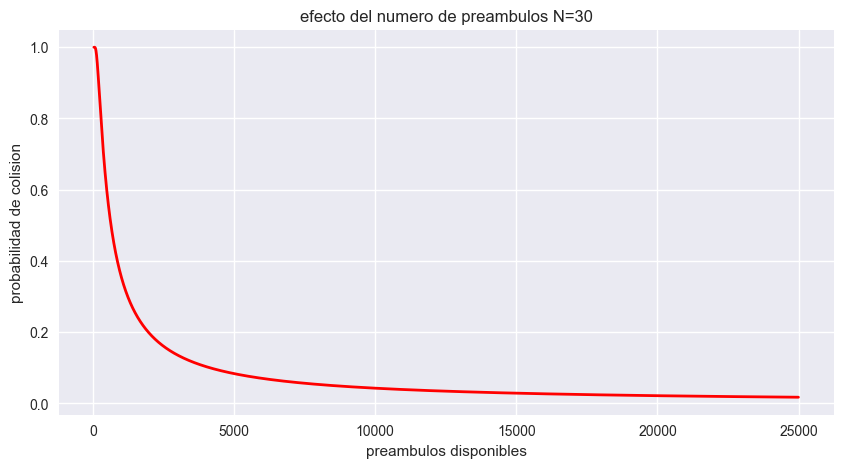

In [187]:

plt.style.use('seaborn-v0_8') 


P = 64  
N = 30   

usuarios = list(range(1, 101))
probabilidades = []

for n in usuarios:
    prob = 1.0
    for i in range(n):
        prob *= (P - i) / P
    probabilidades.append(1 - prob)

plt.figure(figsize=(10, 5))
plt.plot(usuarios, probabilidades, 'b-', linewidth=2)
plt.title("probabilidad de colision vs numero de usuarios")
plt.xlabel("numero de usuarios")
plt.ylabel("probabilidad de colision")
plt.grid(True)
plt.show()


preambulos = list(range(30, 25000, 5))
prob_p = []

for p in preambulos:
    prob = 1.0
    for i in range(N):
        prob *= (p - i) / p
    prob_p.append(1 - prob)

plt.figure(figsize=(10, 5))
plt.plot(preambulos, prob_p, 'r-', linewidth=2)
plt.title("efecto del numero de preambulos N=30")
plt.xlabel("preambulos disponibles")
plt.ylabel("probabilidad de colision")
plt.grid(True)
plt.show()

Este parte código genera dos gráficos clave para analizar colisiones en redes LTE: el primero (Probabilidad vs. Usuarios) muestra cómo aumenta la probabilidad de colisión al incrementar el número de usuarios (N) con P = 64 preámbulos fijos, usando un cálculo teórico basado en probabilidad combinatoria (línea azul), donde a partir de N = 30 la probabilidad crece rápidamente hasta ~80% con 50 usuarios; el segundo (Probabilidad vs. Preámbulos) fija N = 30 y varía P, demostrando que aumentar los preámbulos reduce drásticamente las colisiones (ej: con *P = 150* la probabilidad cae a ~2%, y al aumentar más P se acerca a 0). La correlación es clara: a más usuarios y menos preámbulos, mayor probabilidad de colisión, mientras que menos usuarios y más preámbulos la minimizan. El código usa Matplotlib con estilo Seaborn para visualizar estos efectos de forma intuitiva, destacando la relación no lineal entre congestión y recursos disponibles mediante puntos incrementales que reflejan los valores teóricos.

  # **Conclusión del Análisis de Colisiones en Redes LTE**

En este estudio, exploramos cómo la probabilidad de colisión en redes LTE varía según el número de usuarios (N) y preámbulos disponibles (P). Utilizamos dos enfoques complementarios: simulaciones Monte Carlo (que aproximan resultados mediante repeticiones aleatorias) y cálculos teóricos (que ofrecen precisión matemática). Los resultados mostraron que, con P=64 preámbulos, la probabilidad de colisión supera el 50% al llegar a ~30 usuarios, y se dispara a más del 80% con 50 dispositivos. Esto evidencia que el sistema es altamente sensible a la congestión.  

Además, al analizar el impacto de aumentar los preámbulos (P) con N=30 fijo, observamos que la probabilidad de colisión disminuye drásticamente: de ~25% con P=64 a menos del 2% con P=150 y con p=25,000 disminuye significamente acercándose cada vez más a 0. Esto confirma que escalar recursos (preámbulos) es una estrategia efectiva para mitigar colisiones. Los gráficos generados con matplotlib (con estilo seaborn) visualizaron estas tendencias de forma clara, destacando relaciones no lineales críticas para el diseño de redes.  

**En resumen:**
- La congestión en LTE depende más del número de usuarios que de la falta de preámbulos.  
- Simulaciones y teoría se complementan para predecir colisiones.  
- Aumentar preámbulos mejora significativamente la estabilidad de la red.  

Estos hallazgos son útiles para optimizar redes LTE, especialmente en escenarios de alta densidad (IoT, ciudades inteligentes), donde equilibrar usuarios y recursos es clave a la hora de brindar cualquier servicio relacionado con estos tecnologías. Este ejercicio me ayudo a comprender de manera clara como se puede ver comprometidos las colisiones en una red, y como se puede comportar esta a la hora de verificarlo, esta simulación en si nos ayuda a visualizar esto escenario de una manera mas simulada, y poder resolver estos problema a la hora de solucionar estos errores de colisiones que afectan hoy en día.  
